In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def is_image(in_dir):
    return in_dir.endswith('.jpg') or in_dir.endswith('.png')

In [8]:
for subdir, dirs, files in os.walk('./'):
    for f in files:
        if (is_image(f)):
            file_path = os.path.join(subdir, f)
            crop = cv2.imread(file_path)
            
            if (crop.shape[0] > 200 or crop.shape[1] > 200):
                print(file_path)
                
                break

./Im011_1-13.png


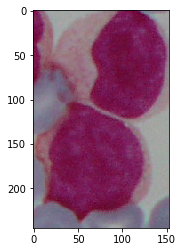

In [10]:
plt.imshow(crop)

In [57]:
def get_center(crop):
    crop_B = crop[:,:,0]
    crop_R = crop[:,:,2]
    I_1 = crop_R - crop_B
    threshold = 100
    
    ret, thresh = cv2.threshold(I_1, threshold, 255, cv2.THRESH_BINARY)
    I_2 = np.invert(thresh)
    
    kernel_size_row = 3
    kernel_size_col = 3
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size_row, kernel_size_col))
    
    erosion = cv2.erode(I_2, kernel, iterations=1)
    dilation = cv2.dilate(erosion, kernel, iterations=1)
    dilation = cv2.dilate(dilation, kernel, iterations=1)
    
    ret, dilation = cv2.threshold(dilation, 0, 255, cv2.THRESH_BINARY)
    
    I_3 = dilation == I_2
    _, contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    original_img = crop.copy()
    
    area_array = []
    center_array = []
    xywh_array = []
    
    for cnt in contours:
        area = cv2.contourArea(cnt)
        
        x,y,w,h = cv2.boundingRect(cnt)
        print(x,y,w,h)
           
        cv2.rectangle(original_img, (x,y), (x+w, y+h), (0,255,0), 2)

    return original_img

0 155 153 90
115 113 38 44
0 70 39 73
119 0 34 32
70 0 5 3
13 0 55 37


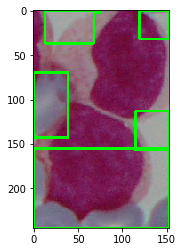

In [56]:
res = get_center(crop)
plt.imshow(res)